# Dimensionality Reduction: Principal Component Analysis

Data source: [Telemetry data](https://www.kaggle.com/garystafford/environmental-sensor-data-132k?select=iot_telemetry_data.csv)

## 1. Scaling the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load data
dataSet = pd.read_csv("D:/3. Projects/AWS Sagemaker/practice/S3/sagemaker-tutorial-rnd/PCA/environment_data.csv")[:10000]
dataSet.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [3]:
# Correlation
data = dataSet[["co", "humidity", "light", "lpg",
                "motion", "smoke", "temp"]].reset_index(drop=True)
data.corr()

,co,humidity,light,lpg,motion,smoke,temp
co,1.000000,-0.748106,0.067426,0.999754,0.031945,0.999833,0.483010
humidity,-0.748106,1.000000,0.597061,-0.734505,-0.040949,-0.736937,0.195155
light,0.067426,0.597061,1.000000,0.087757,-0.021584,0.084168,0.882286
lpg,0.999754,-0.734505,0.087757,1.000000,0.031681,0.999992,0.499842
motion,0.031945,-0.040949,-0.021584,0.031681,1.000000,0.031729,-0.007353
smoke,0.999833,-0.736937,0.084168,0.999992,0.031729,1.000000,0.496888
temp,0.483010,0.195155,0.882286,0.499842,-0.007353,0.496888,1.000000


In [4]:
# Apply standard scaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,co,humidity,light,lpg,motion,smoke,temp
0,0.902679,-1.109586,-0.631349,0.884729,-0.042465,0.887929,-0.022403
1,-1.223982,0.859562,-0.631349,-1.203406,-0.042465,-1.207258,-1.185414
2,0.922855,-1.117462,-0.631349,0.903174,-0.042465,0.906676,-0.061170
3,0.346942,0.922575,1.583910,0.368149,-0.042465,0.364445,1.644578
4,0.914163,-1.117462,-0.631349,0.895230,-0.042465,0.898601,-0.061170


In [5]:
# train test split
train, test = np.split(data_scaled.sample(frac=1, random_state=123), [int(0.8 * len(data))])

In [6]:
# Save the transformed file
train.to_csv(
    "D:/3. Projects/AWS Sagemaker/practice/S3/sagemaker-tutorial-rnd/PCA/environment_train.csv", index=False, header=False)
test.to_csv(
    "D:/3. Projects/AWS Sagemaker/practice/S3/sagemaker-tutorial-rnd/PCA/environment_test.csv", index=False, header=False)

## 2. Apply PCA

In [7]:
# Apply PCA
pca = PCA()
train_pca = pca.fit_transform(train)
train_pca_df = pd.DataFrame(train_pca)
train_pca_df.head()

,0,1,2,3,4,5,6
0,-0.352200,-2.397437,0.028152,-0.099733,0.000498,-0.000573,-2.697106e-07
1,-1.804956,1.163087,-0.125044,0.044897,0.101544,0.004348,3.369420e-05
2,-1.500635,1.002316,-0.112830,-0.027206,-0.007830,-0.005076,-3.375394e-05
3,-1.832314,1.077538,-0.122960,-0.029348,0.060400,0.004468,3.660649e-05
4,-1.631179,1.032896,-0.116825,0.046092,-0.044473,0.001570,-2.751900e-06


In [8]:
# Save PCA train results
train_pca_df.to_csv("D:/3. Projects/AWS Sagemaker/practice/S3/sagemaker-tutorial-rnd/PCA/environment_train_pca.csv", index=False)

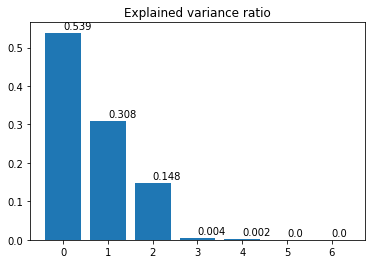

In [9]:
plt.bar(list(range(0,7)), list(pca.explained_variance_ratio_))
for i in range(0,7):
    plt.text(i,pca.explained_variance_ratio_[i]+0.01,round(pca.explained_variance_ratio_[i],3))
plt.title("Explained variance ratio")
plt.show()

With 3 components, the explained variance reaches 99%.